# 最初にトリミング

In [3]:
import numpy as np
from xml.etree import ElementTree
import cv2
from PIL import Image
import tensorflow as tf
import csv
import argparse
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [47]:
image_path = '../img'
image_path2 = '../calib'
save_path="../result_img"
save_path2="../result_calib"
option = "use_const"

In [56]:
def img_size_change():
    global image_path,image_path2,save_path,save_path2
    images = glob.glob(image_path+'/*.jpg')

    print(images)

    for indx, fname in enumerate(images):
        img = cv2.imread(fname)
        img2=img[1100:2340,0:4031]
        img3=cv2.resize(img2,(416,128))
        img_size = (img3.shape[1], img3.shape[0])
        print(img_size)
        #plt.imshow(img3)
        print(save_path+"/"+str(indx)+".jpg")
        cv2.imwrite(save_path+"/"+str(indx)+".jpg",img3)
        images = glob.glob(image_path+'/*.jpg')
    
    images = glob.glob(image_path2+'/*.jpg')
    print(images)

    for indx, fname in enumerate(images):
        img = cv2.imread(fname)
        img2=img[1100:2340,0:4031]
        img3=cv2.resize(img2,(416,128))
        img_size = (img3.shape[1], img3.shape[0])
        print(img_size)
        #plt.imshow(img3)
        print(save_path2+"/"+str(indx)+".jpg")
        cv2.imwrite(save_path2+"/"+str(indx)+".jpg",img3)

In [57]:
img_size_change()

['../img/IMG_8633.jpg']
(416, 128)
../result_img/0.jpg
['../calib/IMG_8649.jpg', '../calib/IMG_8648.jpg', '../calib/IMG_8638.jpg', '../calib/IMG_8639.jpg', '../calib/IMG_8643.jpg', '../calib/IMG_8642.jpg', '../calib/IMG_8656.jpg', '../calib/IMG_8640.jpg', '../calib/IMG_8654.jpg', '../calib/IMG_8655.jpg', '../calib/IMG_8641.jpg', '../calib/IMG_8645.jpg', '../calib/IMG_8651.jpg', '../calib/IMG_8650.jpg', '../calib/IMG_8644.jpg', '../calib/IMG_8652.jpg', '../calib/IMG_8646.jpg', '../calib/IMG_8647.jpg']
(416, 128)
../result_calib/0.jpg
(416, 128)
../result_calib/1.jpg
(416, 128)
../result_calib/2.jpg
(416, 128)
../result_calib/3.jpg
(416, 128)
../result_calib/4.jpg
(416, 128)
../result_calib/5.jpg
(416, 128)
../result_calib/6.jpg
(416, 128)
../result_calib/7.jpg
(416, 128)
../result_calib/8.jpg
(416, 128)
../result_calib/9.jpg
(416, 128)
../result_calib/10.jpg
(416, 128)
../result_calib/11.jpg
(416, 128)
../result_calib/12.jpg
(416, 128)
../result_calib/13.jpg
(416, 128)
../result_calib/1

# 台形設定

In [58]:
file_names=[]
for file in os.listdir(save_path):
    # ファイルのみ、拡張子なしで取得
    if os.path.isfile(os.path.join(save_path, file)):
        file_names.append(os.path.basename(file))

In [68]:
def decide_trapezoids(option):
    trapezoids = []
    if option=="use_const":
        for i in range(len(file_names)):
            trapezoid=[50,529,20,579,300,599]
            trapezoids.append(trapezoid)
    return (trapezoids)

In [26]:
trapezoids_for_dfv=decide_trapezoids(left_lines,right_lines)

# Depth mapの作成

In [76]:
save_path3="../depth"

In [77]:
# struct2depth_evalを実行して入手

# 距離測定

In [84]:
def undistort_img():
    # Prepare object points 0,0,0 ... 8,5,0
    obj_pts = np.zeros((4*4,3), np.float32)
    #obj_pts[:,:2] = np.mgrid[0:7, 0:10].T.reshape(-1,2)
    #これを物理単位にしないとダメそう
    
    obj_pts[:,:2] = np.mgrid[0:4, 0:4].T.reshape(-1,2)*0.022
    #物理単位(m)に変更
    

    # Stores all object points & img points from all images
    objpoints = []
    imgpoints = []

    
    # Get directory for all calibration images
    
    
    #このフォルダ内のたくさんのチェスボード画像がキャリブレーションに使われる
    
    
    
    images = glob.glob(save_path2+'/*.jpg')
    

    for indx, fname in enumerate(images):
        img = cv2.imread(fname)
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        ret, corners = cv2.findChessboardCorners(gray, (4,4), None)

        if ret == True:
            objpoints.append(obj_pts)
            imgpoints.append(corners)
    # Test undistortion on img
    img_size = (img.shape[1], img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None,None)
    
    print(mtx)

    dst = cv2.undistort(img, mtx, dist, None, mtx)
    # Save camera calibration for later use
    dist_pickle = {}
    dist_pickle['mtx'] = mtx
    dist_pickle['dist'] = dist
    pickle.dump( dist_pickle, open(save_path2+'calibration1.p', 'wb') )
    
    #保存
    
    


    
def undistort(img, cal_dir=save_path2+'camera_cal/calibration1.p'):
    #cv2.imwrite('camera_cal_old/test_cal.jpg', dst)
    with open(cal_dir, mode='rb') as f:
        file = pickle.load(f)
    mtx = file['mtx']
    dist = file['dist']
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    
    return dst

In [85]:
undistort_img()

[[535.65613975   0.         127.87819863]
 [  0.         417.80059219  59.66333888]
 [  0.           0.           1.        ]]


In [88]:
def get_mtx(cal_dir=save_path2+'calibration1.p'):
    #cv2.imwrite('camera_cal_old/test_cal.jpg', dst)
    with open(cal_dir, mode='rb') as f:
        file = pickle.load(f)
    mtx = file['mtx']
    
    return mtx

In [89]:
mtx=get_mtx()

In [90]:
inv_mtx = np.linalg.inv(mtx)

In [92]:
file_names_2 = []
for file in os.listdir(save_path2):
    # ファイルのみ、拡張子なしで取得
    if os.path.isfile(os.path.join(save_path2, file)):
        file_names_2.append(os.path.basename(file))

In [93]:
depth_map_dir="../depth/"

i=0

disp_map=np.load(depth_map_dir+ 'result.npy')

In [95]:
depth_map=1/disp_map

TypeError: Invalid dimensions for image data

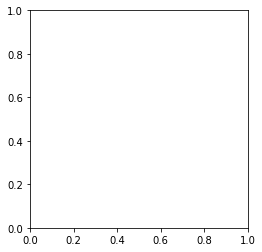

In [96]:
plt.imshow(depth_map, cmap='magma')
plt.title("Depth prediction", fontsize=22)
plt.axis('off')
plt.colorbar()

In [39]:
trapezoid=trapezoids_for_dfv[i]

x_top_left=trapezoid[0]
x_top_right=trapezoid[1]
x_bottom_left=trapezoid[2]
x_bottom_right=trapezoid[3]
y_top=trapezoid[4]
y_bottom=trapezoid[5]

In [40]:
z1=depth_map[y_bottom][x_bottom_right]

In [41]:
z2=depth_map[y_bottom][x_bottom_left]

In [42]:
z3=depth_map[y_top][x_top_left]

In [43]:
z4=depth_map[y_top][x_top_right]

In [44]:
point1=[x_bottom_right,y_bottom,1]

In [45]:
point2=[x_bottom_left,y_bottom,1]

In [46]:
point3=[x_top_left,y_top,1]

In [47]:
point4=[x_top_right,y_top,1]

In [48]:
newpt1=z1*np.dot(inv_mtx,point1)
newpt2=z2*np.dot(inv_mtx,point2)
newpt3=z3*np.dot(inv_mtx,point3)
newpt4=z4*np.dot(inv_mtx,point4)

In [49]:
left_length=np.linalg.norm(newpt2-newpt3, ord=2)

In [50]:
right_length=np.linalg.norm(newpt1-newpt4, ord=2)

In [51]:
width1=np.linalg.norm(newpt2-newpt1, ord=2)

In [52]:
width2=np.linalg.norm(newpt4-newpt3, ord=2)

In [53]:
print(left_length)

20.875798293329307


In [54]:
print(right_length)

20.758779021904544


In [55]:
print(width1)

4.061194513184261


In [56]:
print(width2)

3.9456382454462324


In [57]:
def decide_x_split(i=i,trapezoids_for_dfv=trapezoids_for_dfv,width1=width1,width2=width2,bonnet=bonnet):
    trapezoid=trapezoids_for_dfv[i]

    x_top_left=trapezoid[0]
    x_top_right=trapezoid[1]
    x_bottom_left=trapezoid[2]
    x_bottom_right=trapezoid[3]
    y_top=trapezoid[4]
    y_bottom=trapezoid[5]
    
    temp=(width1+width2)/2
    result=temp//0.5
    return result


In [58]:
def decide_y_split(i=i,trapezoids_for_dfv=trapezoids_for_dfv,left_length=left_length,right_length=right_length,bonnet=bonnet):
    trapezoid=trapezoids_for_dfv[i]

    x_top_left=trapezoid[0]
    x_top_right=trapezoid[1]
    x_bottom_left=trapezoid[2]
    x_bottom_right=trapezoid[3]
    y_top=trapezoid[4]
    y_bottom=trapezoid[5]
    
    temp=(left_length+right_length)/2
    result=int(temp/0.5*(bonnet-y_top)/(y_bottom-y_top))
    
    return result





In [59]:
#x_split=decide_x_split()
#y_split=decide_y_split()

## 分割数決定コードの精度が低いため現在は分割数は決め打ちで対応

In [60]:
x_split =10
y_split =10